In [2]:
''' Importing necessary Libraries'''
import pandas as pd
import numpy as np
from keras import Sequential
from keras.layers import Dropout,Dense
from keras.activations import sigmoid,relu

In [3]:
''' Importing the dataset'''
df=pd.read_csv('credit-card-default.csv')
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,defaulted
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [6]:
df.shape

(30000, 25)

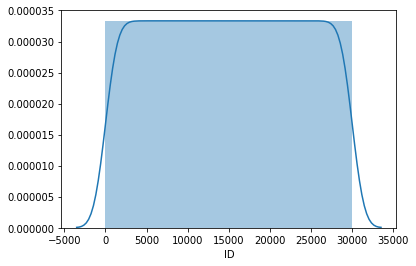

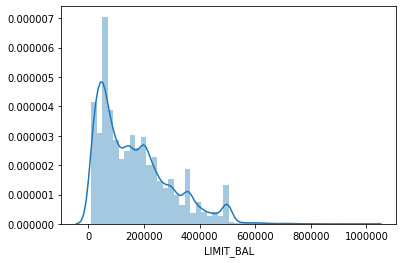

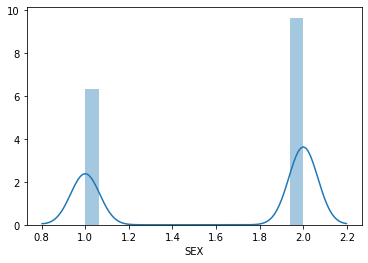

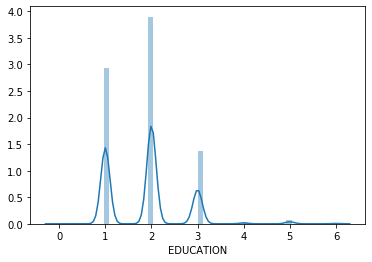

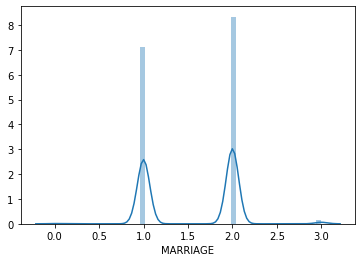

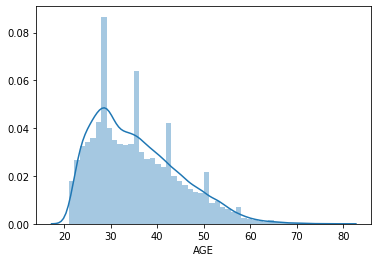

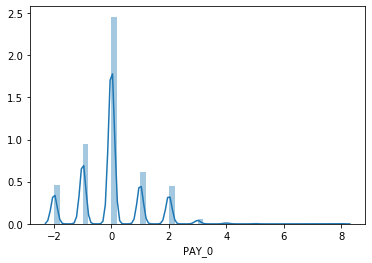

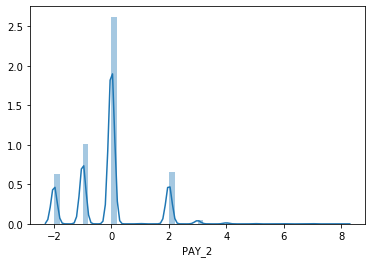

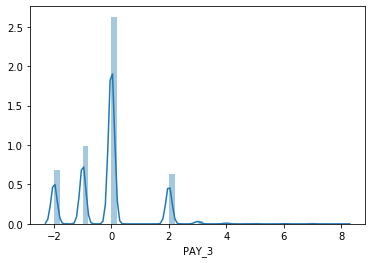

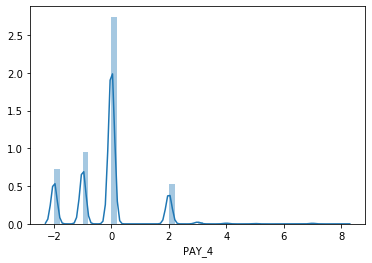

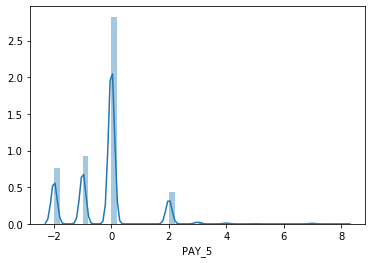

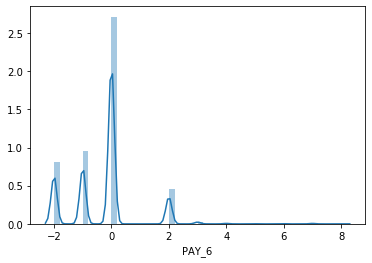

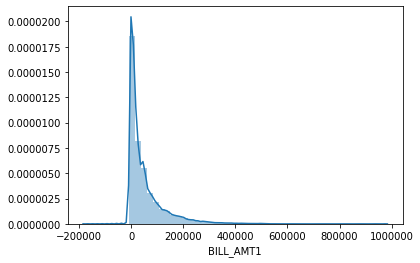

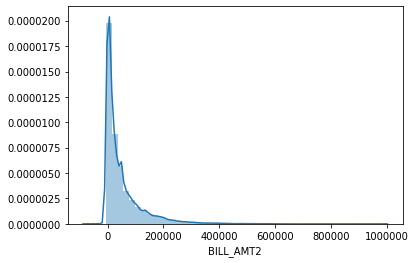

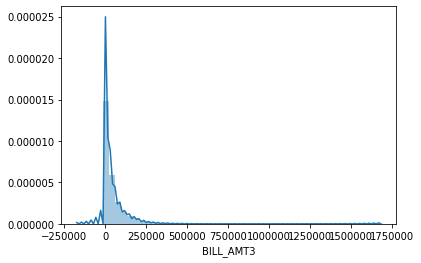

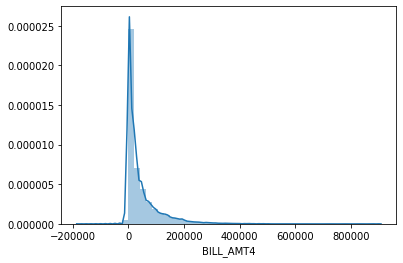

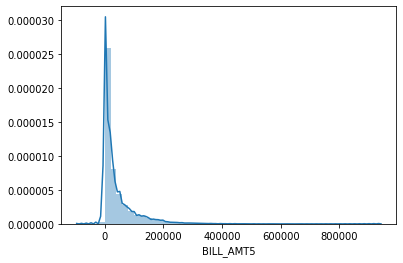

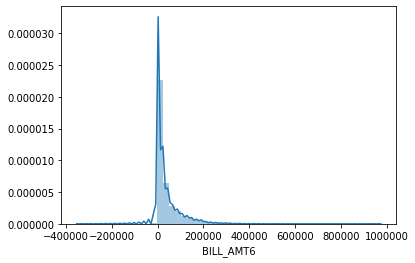

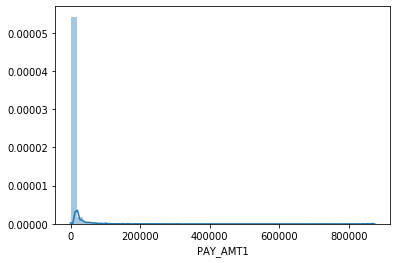

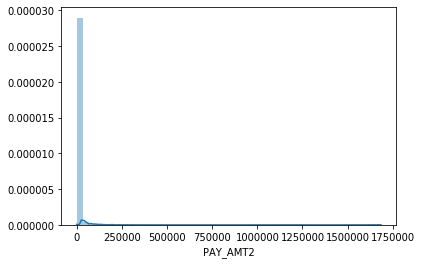

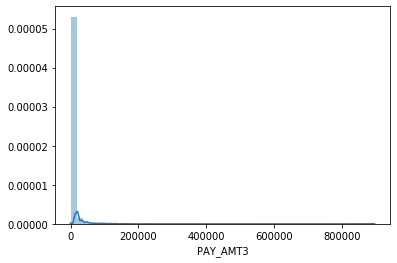

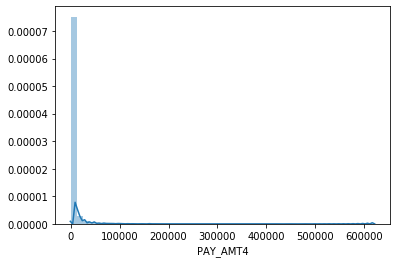

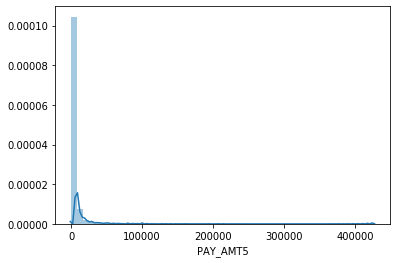

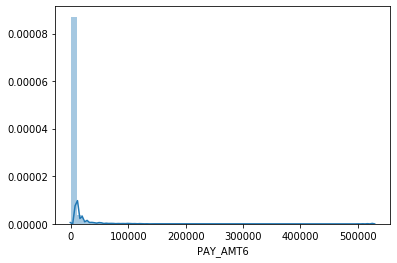

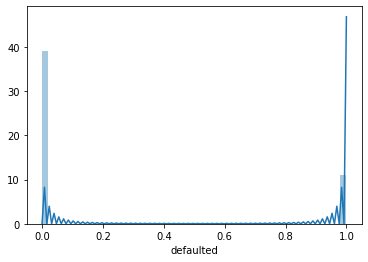

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
for i in df.columns:
    sns.distplot(df[i])
    plt.show()

In [7]:
for i in ['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4',
          'BILL_AMT5','BILL_AMT6','PAY_AMT1','PAY_AMT2',
          'PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']:
    df=df[df[i]>=0]
df.shape

(28070, 25)

In [29]:
''' Upsampling the Minority class'''
y=df['defaulted']
X=df.drop('defaulted',1)

from imblearn.over_sampling import SMOTE

sm=SMOTE(random_state=42)

X1,y1=sm.fit_resample(X,y)
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X1,y1,test_size=0.3,
                                              random_state=42)

C:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [30]:
'''Scaling the data as the values are in different scales.'''
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()

X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)
y_train,y_test=np.array(y_train),np.array(y_test)

In [31]:
''' Building a Neural Network with given number of nodes for
each Layer'''
model=Sequential()

model.add(Dense(units=6,kernel_initializer='he_uniform',
               activation='relu'))
model.add(Dense(units=6,kernel_initializer='he_uniform',
               activation='relu'))
model.add(Dense(units=1,activation='sigmoid',
                kernel_initializer='glorot_uniform'))
model.compile(optimizer='Adamax',loss='binary_crossentropy',
             metrics=['accuracy'])

In [32]:
'''Fitting the train data to the model'''
ann=model.fit(X_train,y_train,validation_split=0.33,epochs=100)

Train on 20402 samples, validate on 10050 samples
Epoch 1/100
20402/20402 [==============================] - 2s 117us/step - loss: 0.6206 - accuracy: 0.6816 - val_loss: 0.6011 - val_accuracy: 0.7107
Epoch 2/100
20402/20402 [==============================] - 2s 92us/step - loss: 0.5729 - accuracy: 0.7264 - val_loss: 0.5793 - val_accuracy: 0.7229
Epoch 3/100
20402/20402 [==============================] - 2s 84us/step - loss: 0.5564 - accuracy: 0.7340 - val_loss: 0.5655 - val_accuracy: 0.7276
Epoch 4/100
20402/20402 [==============================] - 2s 81us/step - loss: 0.5466 - accuracy: 0.7378 - val_loss: 0.5579 - val_accuracy: 0.7288
Epoch 5/100
20402/20402 [==============================] - 2s 93us/step - loss: 0.5412 - accuracy: 0.7392 - val_loss: 0.5534 - val_accuracy: 0.7297
Epoch 6/100
20402/20402 [==============================] - 2s 81us/step - loss: 0.5378 - accuracy: 0.7415 - val_loss: 0.5496 - val_accuracy: 0.7332
Epoch 7/100
20402/20402 [==============================] - 2s

Epoch 56/100
20402/20402 [==============================] - 2s 80us/step - loss: 0.5023 - accuracy: 0.7588 - val_loss: 0.5177 - val_accuracy: 0.7559
Epoch 57/100
20402/20402 [==============================] - 2s 91us/step - loss: 0.5020 - accuracy: 0.7602 - val_loss: 0.5153 - val_accuracy: 0.7560
Epoch 58/100
20402/20402 [==============================] - 2s 80us/step - loss: 0.5017 - accuracy: 0.7583 - val_loss: 0.5152 - val_accuracy: 0.7554
Epoch 59/100
20402/20402 [==============================] - 2s 81us/step - loss: 0.5013 - accuracy: 0.7581 - val_loss: 0.5148 - val_accuracy: 0.7558
Epoch 60/100
20402/20402 [==============================] - 2s 92us/step - loss: 0.5008 - accuracy: 0.7612 - val_loss: 0.5142 - val_accuracy: 0.7567
Epoch 61/100
20402/20402 [==============================] - 2s 81us/step - loss: 0.5001 - accuracy: 0.7617 - val_loss: 0.5144 - val_accuracy: 0.7562
Epoch 62/100
20402/20402 [==============================] - 2s 80us/step - loss: 0.4999 - accuracy: 0.7598

In [33]:
'''Predicting values based on the test data'''
y_pred=model.predict(X_test)
y_pred

array([[0.8911152 ],
       [0.6550746 ],
       [0.1377179 ],
       ...,
       [0.20560588],
       [0.69995904],
       [0.30622157]], dtype=float32)

In [34]:
'''Converting the predicted value to an array'''
predicted=[]
for i in y_pred:
    if i<0.5:
        predicted.append(0)
    else:
        predicted.append(1)
y_pred=np.array(predicted)

In [36]:
'''Checking for the number of False Positive and False Negative values'''
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score
confusion_matrix(y_test,y_pred)

array([[5210, 1334],
       [1765, 4743]], dtype=int64)

In [37]:
'''Checking for the F1 score'''
f1_score(y_test,y_pred)

0.7537544696066746

### Hyper Parameter Tuning


- Using Grid Search CV to tune the hyper parameters of the Neural Network model.

In [41]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from keras.layers import Activation

In [ ]:
'''Function to create a model with Layers and Activation Functions,
defined in the param_grid of the GridSearchCV'''
def create_model(layers,activation):
    model=Sequential()
    for i,node in enumerate(layers):
        if i==0:
            model.add(Dense(node,input_dim=X_train.shape[1]))
            model.add(Activation(activation))
            model.add(Dropout(0.3))
        else:
            model.add(Dense(node))
            model.add(Activation(activation))
            model.add(Dropout(0.3))
    model.add(Dense(1,activation='sigmoid',
                    kernel_initializer='glorot_uniform'))
    model.compile(optimizer='Adamax',metrics=['accuracy'],
                 loss='binary_crossentropy')
    return model

In [42]:
'''Using GridSearchCV to try out different combinations of the
hyperparameters listed below to obtain the best combination.'''
model=KerasClassifier(build_fn=create_model,verbose=0)

layers=[[30],[30,20],[50,25,20]]
activations=['sigmoid','relu']
param_grid=dict(layers=layers,activation=activations,
               batch_size=[128,256],epochs=[30])
grid=GridSearchCV(estimator=model,param_grid=param_grid)

grid_res=grid.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [43]:
'''Getting the best result and the best comination of hyper parameters'''
print(grid_res.best_score_,'\n',grid_res.best_params_)

0.7548600938251888 
 {'activation': 'relu', 'batch_size': 128, 'epochs': 30, 'layers': [50, 25, 20]}


In [46]:
'''Using the best parameters obtained, building a NN.'''
model=Sequential()

model.add(Dense(units=50,activation='relu',
                kernel_initializer='he_uniform'))
model.add(Dense(units=25,activation='relu',
                kernel_initializer='he_uniform'))
model.add(Dense(units=20,activation='relu',
                kernel_initializer='he_uniform'))
model.add(Dense(units=1,activation='sigmoid'))

model.compile(optimizer='Adamax',loss='binary_crossentropy')

In [47]:
ann=model.fit(X_train,y_train,epochs=30)

Epoch 1/30
30452/30452 [==============================] - 6s 194us/step - loss: 0.5590
Epoch 2/30
30452/30452 [==============================] - 2s 74us/step - loss: 0.5269
Epoch 3/30
30452/30452 [==============================] - 2s 80us/step - loss: 0.5172
Epoch 4/30
30452/30452 [==============================] - 2s 74us/step - loss: 0.5099
Epoch 5/30
30452/30452 [==============================] - 2s 75us/step - loss: 0.5044
Epoch 6/30
30452/30452 [==============================] - 2s 81us/step - loss: 0.4996
Epoch 7/30
30452/30452 [==============================] - 2s 76us/step - loss: 0.4946
Epoch 8/30
30452/30452 [==============================] - 2s 81us/step - loss: 0.4911
Epoch 9/30
30452/30452 [==============================] - 2s 72us/step - loss: 0.4877
Epoch 10/30
30452/30452 [==============================] - 2s 79us/step - loss: 0.4844
Epoch 11/30
30452/30452 [==============================] - 2s 72us/step - loss: 0.4810
Epoch 12/30
30452/30452 [==========================

In [49]:
y_pred=model.predict(X_test)

In [51]:
predicted=[]
for i in y_pred:
    if i<0.5:
        predicted.append(0)
    else:
        predicted.append(1)
y_pred=np.array(predicted)

In [52]:
confusion_matrix(y_test,y_pred)

array([[5153, 1391],
       [1565, 4943]], dtype=int64)

In [53]:
accuracy_score(y_test,y_pred)

0.7735212994177137

### If we had more records in the dataset, the model would've learnt more patterns and the accuracy of the model would've been more as compared to what is obtained from the model built.